# Montecarlo Simulation: Profit, Asset Prices, Black-Scholes

## Gross Profit Simulation

In [124]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
sns.set()
%matplotlib inline

In [128]:
# Revenue mean in millions
rev_m = 170
# Revenue Std Dev in millions
rev_stdev = 20
iterations = 1000

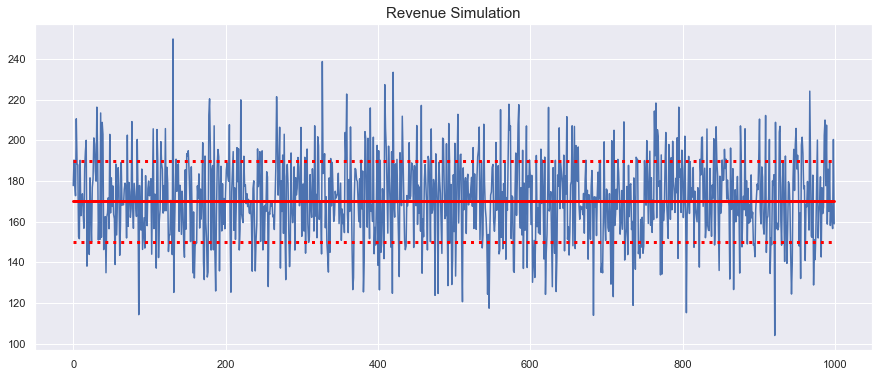

In [158]:
rev = np.random.normal(rev_m,rev_stdev,iterations)
plt.figure(figsize=(15,6))
plt.title('Revenue Simulation',size=15)
plt.plot(rev)
# Mean line
plt.plot(np.arange(1000),np.ones(1000)*rev_m,color='red',linewidth=3)
plt.plot(np.arange(1000),np.ones(1000)*rev_m + rev_stdev,
         color='red',linewidth=3,linestyle='dotted')
plt.plot(np.arange(1000),np.ones(1000)*rev_m - rev_stdev,
         color='red',linewidth=3,linestyle='dotted')

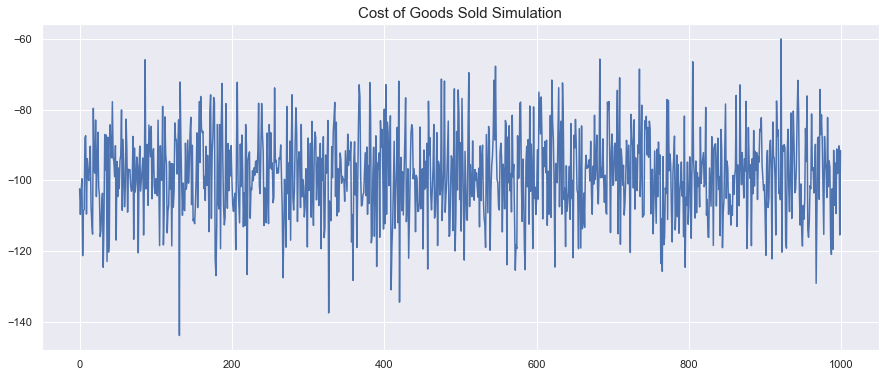

In [159]:
# Cost of goods sold as percentage of revenues
COGS = - (rev * np.random.normal(0.6,0.1))
plt.figure(figsize=(15,6))
plt.title('Cost of Goods Sold Simulation',size=15)
plt.plot(COGS)

In [21]:
COGS.mean()

-107.81922483522075

In [23]:
COGS.std()

12.687393574537037

In [24]:
107/12

8.916666666666666

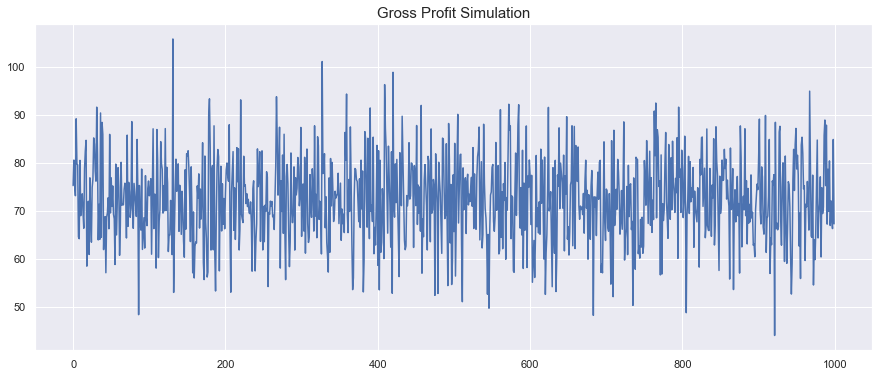

In [160]:
gross_profit = rev + COGS
plt.figure(figsize=(15,6))
plt.title('Gross Profit Simulation',size=15)
plt.plot(gross_profit)

In [132]:
np.max(gross_profit)

78.5396289602586

In [35]:
np.min(gross_profit)

31.69431273905586

In [36]:
gross_profit.mean()

56.752469471366304

In [37]:
gross_profit.std()

6.850489973595815

(array([  1.,   4.,  13.,  20.,  33.,  59.,  88., 121., 143., 129., 124.,
        102.,  63.,  48.,  32.,  13.,   4.,   1.,   1.,   1.]),
 array([ 44.05312259,  47.1407049 ,  50.22828722,  53.31586954,
         56.40345185,  59.49103417,  62.57861648,  65.6661988 ,
         68.75378112,  71.84136343,  74.92894575,  78.01652806,
         81.10411038,  84.1916927 ,  87.27927501,  90.36685733,
         93.45443965,  96.54202196,  99.62960428, 102.71718659,
        105.80476891]),
 <a list of 20 Patch objects>)

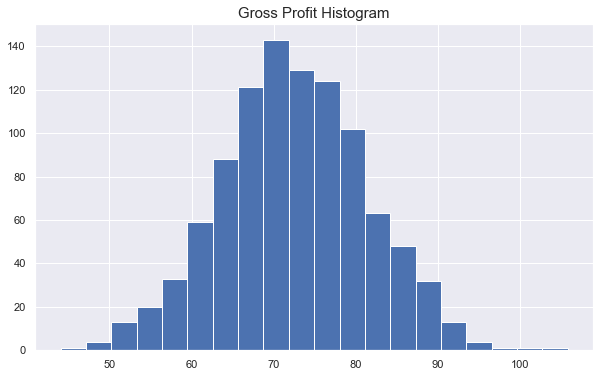

In [161]:
plt.figure(figsize=(10,6))
plt.title('Gross Profit Histogram',size=15)
plt.hist(gross_profit,bins=20)

## Asset Pricing Simulation: Brownian Motion

In [40]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker,data_source='yahoo',start='2007-1-1')['Adj Close']

In [41]:
log_returns = np.log(data['PG'] / data['PG'].shift(1))

In [42]:
log_returns.tail()

Date
2020-03-23   -0.047278
2020-03-24    0.055445
2020-03-25   -0.023019
2020-03-26    0.062046
2020-03-27    0.025651
Name: PG, dtype: float64

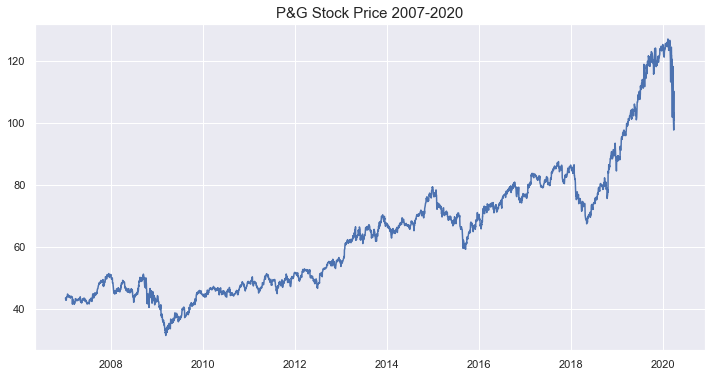

In [163]:
plt.figure(figsize=(12,6))
plt.title('P&G Stock Price 2007-2020',size=15)
plt.plot(data)

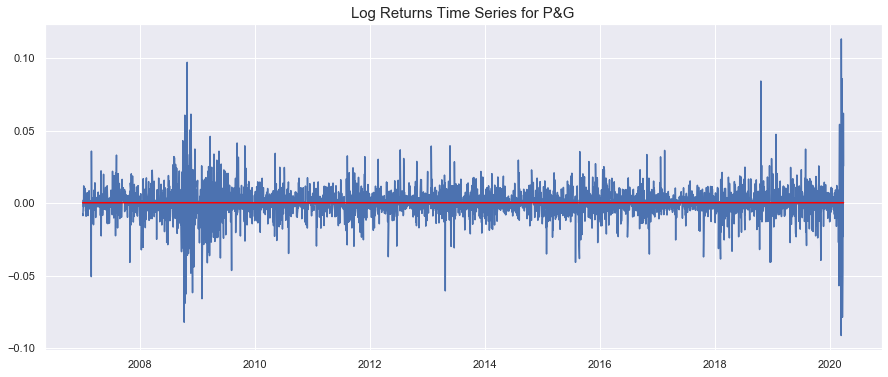

In [164]:
plt.figure(figsize=(15,6))
plt.title('Log Returns Time Series for P&G',size=15)
plt.plot(log_returns)
plt.plot(data.index,np.ones(len(data))*log_returns.mean(),color='red')

In [59]:
u = log_returns.mean()
var = log_returns.var()
# Drift = u - 0.5*var
drift = u - 0.5*var
drift

0.0002095064188696352

In [63]:
# Standard Deviation for volatility
stdev = log_returns.std()
stdev

0.011824969864073874

In [66]:
# Random values between 0 and 1 with shape (10,2)
x = np.random.rand(10,2)
x

array([[0.32466536, 0.99428284],
       [0.19100195, 0.83460818],
       [0.28647879, 0.17312468],
       [0.72822082, 0.99543509],
       [0.91157559, 0.4391153 ],
       [0.50960604, 0.46799407],
       [0.54532343, 0.17536171],
       [0.83486213, 0.67842627],
       [0.11414994, 0.64924244],
       [0.6541361 , 0.65994558]])

In [67]:
# Corresponding z values from simulated probabilities
norm.ppf(x)

array([[-0.45469216,  2.52913773],
       [-0.87420999,  0.97253667],
       [-0.56370108, -0.94188921],
       [ 0.60744089,  2.6071547 ],
       [ 1.3505213 , -0.15321264],
       [ 0.0240811 , -0.08031322],
       [ 0.1138545 , -0.93318703],
       [ 0.97355862,  0.46330264],
       [-1.20474987,  0.38327601],
       [ 0.3965114 ,  0.41231461]])

In [68]:
t_intervals = 1000
iterations = 10

In [71]:
# daily returns = exp(r)
# r = drift + stdev*z
r = drift + stdev*norm.ppf(np.random.rand(t_intervals,iterations))
daily_returns = np.exp(r)
daily_returns

array([[0.99465715, 0.99921558, 0.99737694, ..., 0.99547179, 1.00144873,
        1.01284824],
       [1.00091479, 1.01126759, 0.99770454, ..., 1.01489725, 0.99763777,
        1.01200609],
       [0.98510679, 1.00783411, 1.01761584, ..., 1.01053074, 0.99312167,
        1.00477873],
       ...,
       [1.01660465, 1.00235496, 1.03250914, ..., 1.01231426, 1.00235423,
        0.99307619],
       [1.00610498, 0.99171984, 0.98758439, ..., 0.98270681, 0.99212295,
        1.00688668],
       [1.01144335, 0.99766236, 1.01380856, ..., 1.00073572, 0.9863165 ,
        0.99735406]])

In [73]:
# Last known value to start simulation
S0 = data.iloc[-1]
S0

PG    110.169998
Name: 2020-03-27 00:00:00, dtype: float64

In [74]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
price_list[0] = S0
for t in range(1,t_intervals):
    price_list[t] = price_list[t-1]*daily_returns[t]

In [77]:
price_list

array([[110.16999817, 110.16999817, 110.16999817, ..., 110.16999817,
        110.16999817, 110.16999817],
       [110.27078057, 111.4113487 , 109.91710718, ..., 111.81122809,
        109.9097508 , 111.49270937],
       [108.62849445, 112.28415768, 111.85338952, ..., 112.98868328,
        109.15375524, 112.02550243],
       ...,
       [328.9773552 , 109.2806906 , 165.61766201, ..., 159.34509743,
         78.79221251, 179.65392849],
       [330.9857567 , 108.37582878, 163.56141738, ..., 156.58951162,
         78.17156268, 180.8911479 ],
       [334.77334184, 108.12248558, 165.81996435, ..., 156.70471699,
         77.10190202, 180.41252108]])

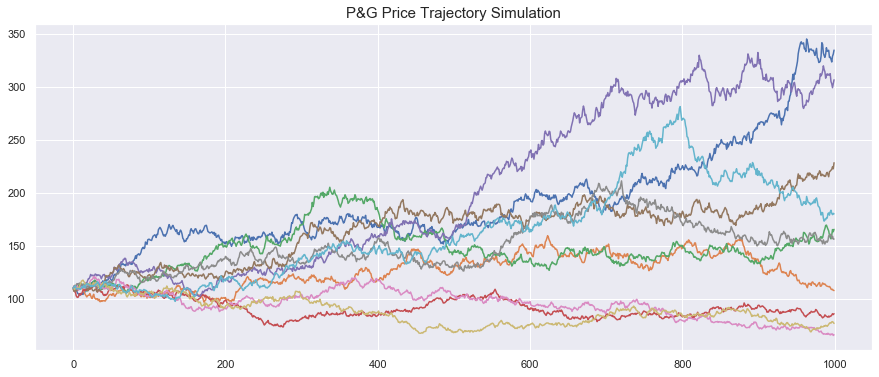

In [157]:
plt.figure(figsize=(15,6))
plt.title('P&G Price Trajectory Simulation',size=15)
plt.plot(price_list)

In [81]:
# Plot histogram for future stock prices
days = 100
iterations = 100
r = drift + stdev*norm.ppf(np.random.rand(days,iterations))
daily_returns = np.exp(r)
price_list2 = np.zeros_like(daily_returns)
price_list2[0] = S0
for t in range(1,days):
    price_list2[t] = price_list2[t-1]*daily_returns[t]

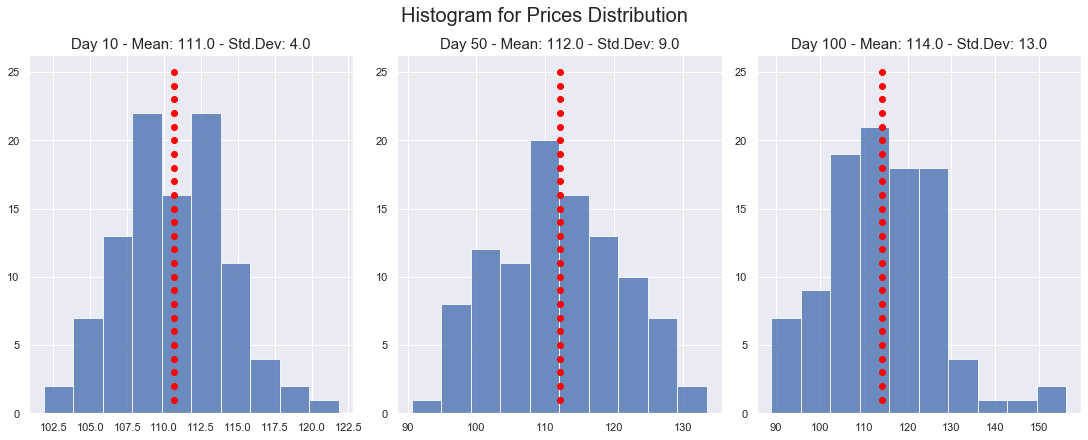

In [156]:
fig,ax = plt.subplots(1,3,constrained_layout=True)
fig.figsize = (25,6)
days = [9,46,99]
titles = ['Day 10','Day 50','Day 100']
fig.set_figheight(6)
fig.set_figwidth(15)
fig.suptitle('Histogram for Prices Distribution',size=20)
for i in range(3):
    mean = price_list2[days[i],:].mean()
    std_dev = price_list2[days[i],:].std()
    mean_vector = np.ones(25)*mean
    mean_y = np.arange(1,26)
    ax[i].scatter(mean_vector,mean_y,color='red',zorder=2,linewidths=1)
    ax[i].hist(price_list2[days[i],:],alpha=0.8)
    title = titles[i]+' - Mean: '+str(round(mean))+' - Std.Dev: '+str(round(std_dev))
    ax[i].set_title(title,size=15)
    

## Black-Scholes Simulation

### $$d_{1}=\frac{ln(\frac{S}{K})+(r+\frac{\sigma^2}{2})t}{\sigma.\sqrt{t}}$$
### $$d_{2}=d_{1}-s.\sqrt{t} = \frac{ln(\frac{S}{K})+(r-\frac{\sigma^2}{2})t}{\sigma.\sqrt{t}}$$

In [196]:
# t (time to maturity) is measured in years
def d1(S,K,rf,stdev,t):
    numerator = np.log(S/K)+(rf+stdev**2/2)*t
    denominator = stdev*np.sqrt(t)
    return numerator / denominator

In [197]:
def d2(S,K,rf,stdev,t):
    numerator = np.log(S/K)+(rf-stdev**2/2)*t
    denominator = stdev*np.sqrt(t)
    return numerator / denominator

### $$C=N(d_{1})S - N(d_{2})Ke^{-rt}$$

In [198]:
def BSM(S,K,rf,stdev,t):
    first = norm.cdf(d1(S,K,rf,stdev,t))*S
    second = norm.cdf(d2(S,K,rf,stdev,t))*K*np.exp(-r*t)
    return first - second

In [176]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker,data_source='yahoo',
                             start='2007-1-1',end='2017-3-21')['Adj Close']

In [238]:
S = data.iloc[-1]
S

PG    83.241959
Name: 2017-03-21 00:00:00, dtype: float64

In [180]:
log_returns = np.log(data/data.shift(1))
log_returns.tail()

,PG
Date,
2017-03-15,0.004386
2017-03-16,0.000438
2017-03-17,-0.004824
2017-03-20,0.002415
2017-03-21,-0.000329


In [182]:
stdev = log_returns.std()*250**0.5
stdev

PG    0.176551
dtype: float64

In [185]:
# Risk free rate, strike price, time to maturity
rf = 0.025
K = 110
t = 1

In [239]:
d1(S,K,rf,stdev,t)

PG    3.534838
Name: 2017-03-21 00:00:00, dtype: float64

In [240]:
d2(S,K,rf,stdev,t)

PG    0.743329
Name: 2017-03-21 00:00:00, dtype: float64

In [241]:
BSM(S,K,rf,stdev,t)

PG    83.061178
Name: 2017-03-21 00:00:00, dtype: float64

### Montecarlo Simulation - Euler Discretization

### $$S_{t}=S_{t-1}.e^{((r-\frac{1}{2}.\sigma^2).\delta_{t}+\sigma.\sqrt{\delta_{t}}.Z_{t})}$$

$$\delta_{t} = \text{fixed time interval}$$

In [202]:
# Risk free rate 
rf = 0.025

In [205]:
stdev = np.float(stdev)
stdev

0.17655053405733956

In [207]:
# time to maturity = year
t = 1
t_intervals = 250
delta_t = t / t_intervals
iterations = 10000

In [208]:
Z  = np.random.standard_normal((t_intervals+1,iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

In [210]:
for t in range(1,t_intervals+1):
    S[t] = S[t-1]*np.exp((r-0.5*stdev**2)*delta_t**0.5*Z[t])

In [212]:
S.shape

(251, 10000)

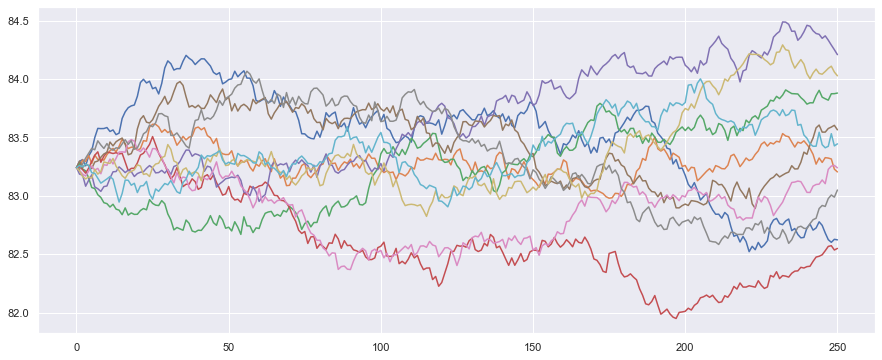

In [213]:
plt.figure(figsize=(15,6))
plt.plot(S[:,:10])

In [247]:
# Value if option is excercised; K = 60
payoff = np.maximum(S[-1]-60,0)

### $$C=\frac{e^{-rt}.\sum{p_{i}}}{iterations}$$

In [246]:
C = np.exp(-rf*t)*np.sum(payoff) / iterations
C

4.486753514846807e-06